In [1]:
import numpy as np
import matplotlib.pyplot as plt

def dft_matricial(x):

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))

    W = np.exp(-2j * np.pi * k * n / N)

    X = np.dot(W, x)

    return X



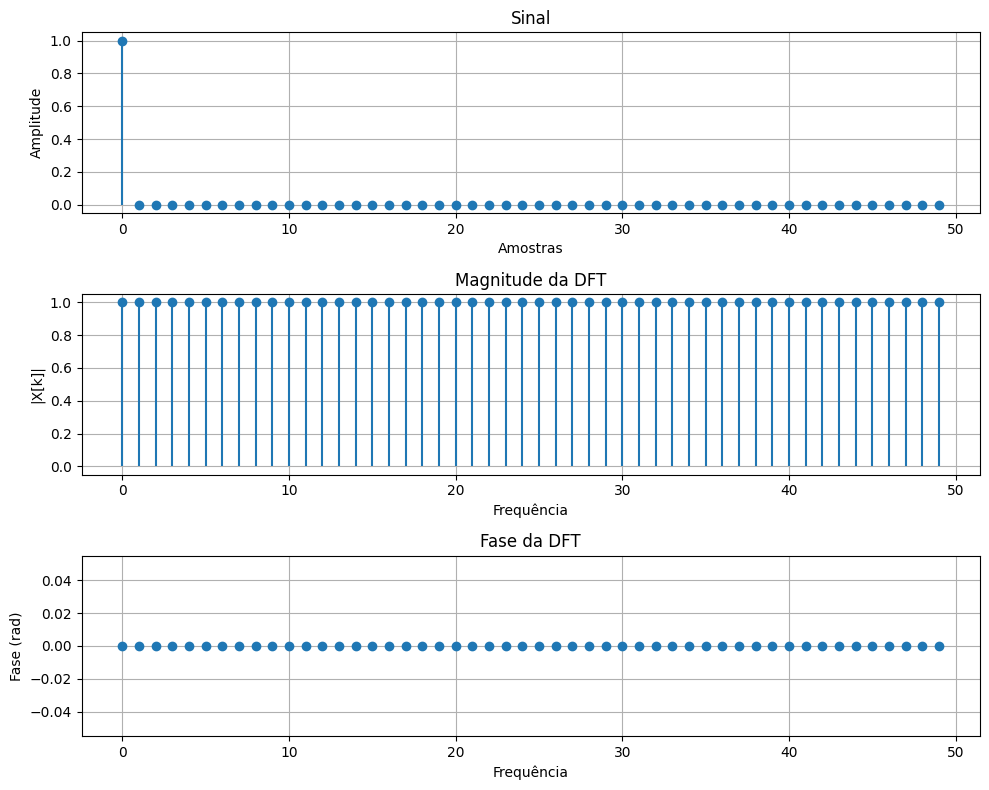

In [4]:
N = 50
x1 = np.zeros(N)
x1[0] = 1  # impulso em n = 0

X1 = dft_matricial(x1)
n = np.arange(N)

plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
plt.stem(n, x1, basefmt=" ")
plt.title(f'Sinal')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.stem(n, np.abs(X1), basefmt=" ")
plt.title(f'Magnitude da DFT')
plt.xlabel('Frequência')
plt.ylabel('|X[k]|')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.stem(n, np.angle(X1), basefmt=" ")
plt.title(f'Fase da DFT')
plt.xlabel('Frequência')
plt.ylabel('Fase (rad)')
plt.grid(True)

plt.tight_layout()
plt.show()

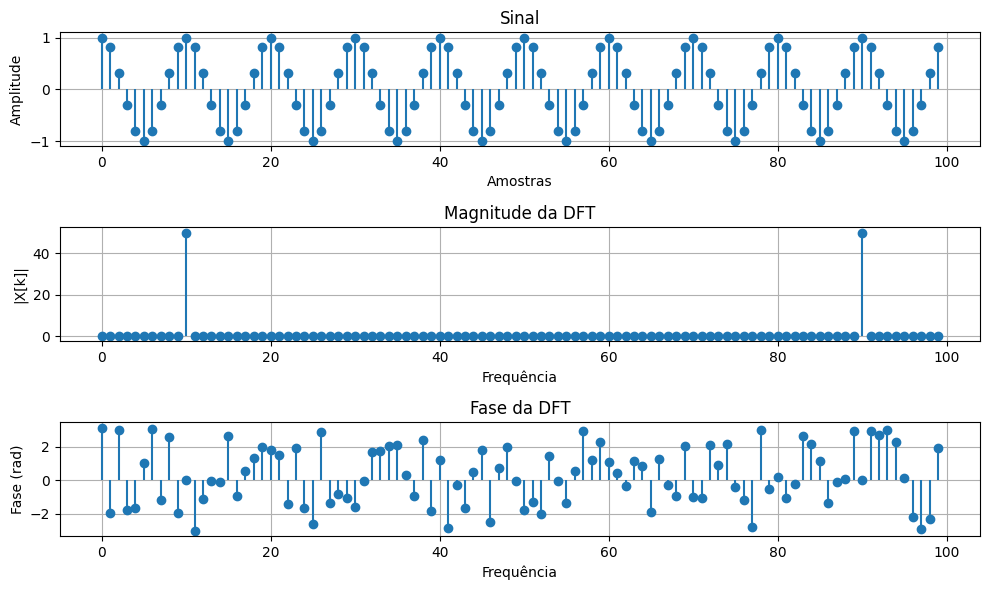

In [5]:
N = 100
n = np.arange(N)
f = 10
x3 = np.cos(2 * np.pi * f * n / N)

X3 = dft_matricial(x3)

plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.stem(n, x3, basefmt=" ")
plt.title(f'Sinal')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.stem(n, np.abs(X3), basefmt=" ")
plt.title(f'Magnitude da DFT')
plt.xlabel('Frequência')
plt.ylabel('|X[k]|')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.stem(n, np.angle(X3), basefmt=" ")
plt.title(f'Fase da DFT')
plt.xlabel('Frequência')
plt.ylabel('Fase (rad)')
plt.grid(True)

plt.tight_layout()
plt.show()


# Transformada Rápida de Fourier (FFT) por Decimação no Tempo

---

## **1. Fundamentação Teórica**

### **1.1. DFT Convencional**
A DFT de um sinal $x(n)$ de comprimento $N$ é dada por:
$$
X[k] = \sum_{n=0}^{N-1} x(n) W_N^{kn}, \quad \text{onde} \quad W_N = e^{-j 2\pi / N}
$$

Cálculo direto requer $N^2$ operações.

---

### **1.2. FFT**
A FFT por decimação no tempo divide o sinal em **subsequências pares e ímpares**, calculando DFTs menores e combinando os resultados.

#### **Divisão do Sinal**

$$X[k] = \sum\limits_{n\ par}^{N/2-1}x(n)W_N^{kn} + \sum\limits_{n\ ímpar}^{N/2-1}x(n)W_N^{kn}$$

Fazendo $n=2r$ e $n=2r+1$ em cada um dos somatórios, reescrevemos:

- **Índices pares**: $x_{\text{par}}(n) = x(2r)$
- **Índices ímpares**: $x_{\text{impar}}(n) = x(2r + 1)$

$$X[k] = \sum\limits_{r=0}^{N/2-1}x(2r)W_N^{2kr} + \sum\limits_{r=0}^{N/2-1}x(2r + 1)W_N^{(2r+1)k}$$
  
$$X[k] = \sum\limits_{r=0}^{N/2-1}x(2r)(W_N^2)^{kr} + W_N^k\sum\limits_{r=0}^{N/2-1}x(2r + 1)(W_N^2)^{kr}$$

Mas, $W_N^2 = W_{N/2}$ já que:

$$W_N^2 = e^{(-j2\pi/N)2} = e^{-j2\pi/(N/2)} = W_{N/2}$$

Então, podemos reescrever $X[k]$ como:

$$X[k] = \sum\limits_{r=0}^{N/2-1}x(2r)(W_{N/2})^{kr} + W_N^k\sum\limits_{r=0}^{N/2-1}x(2r + 1)(W_{N/2})^{kr}$$

$$X[k] = G[k] + W_N^k [k]$$

In [6]:
def zero_padding(sinal, potencia_de_2=True):

    N_original = len(sinal)
    
    if potencia_de_2:
        N_novo = 2 ** int(np.ceil(np.log2(N_original)))
    else:
        N_novo = N_original
    
    sinal_padded = np.zeros(N_novo, dtype=sinal.dtype)
    sinal_padded[:N_original] = sinal
    
    return sinal_padded
    
def fft_dec(x):

    N = len(x)

    if N == 1:
        return x

    pares = x[::2]
    impares = x[1::2]

    X_par = fft_dec(pares) # indices pares
    X_impar = fft_dec(impares) # indices ímpares

    k = np.arange(N // 2)
    W_N = np.exp(-2j * np.pi * k / N)

    X = np.zeros(N, dtype=np.complex128)
    X[:N//2] = X_par + W_N * X_impar
    X[N//2:] = X_par - W_N * X_impar

    return X


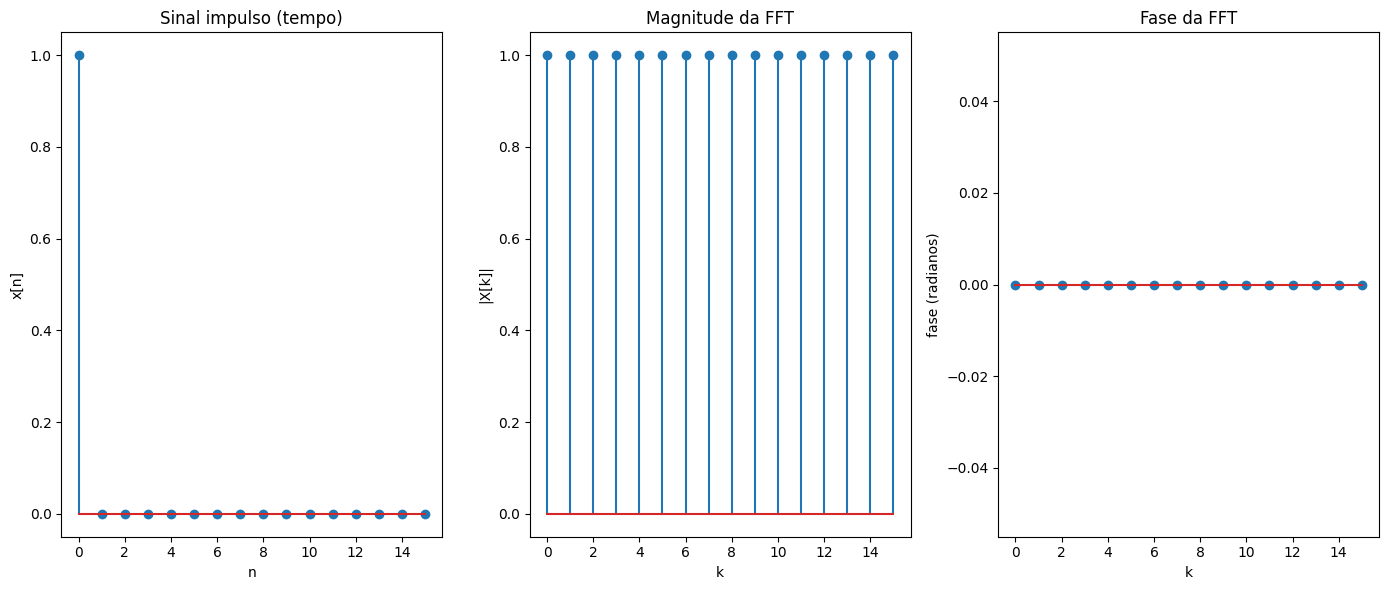

In [7]:
# Sinal impulso
x = np.zeros(10)
x[0] = 1

x_padded = zero_padding(x, potencia_de_2=True)
X = fft_dec(x_padded)
magnitude = np.abs(X)
fase = np.angle(X)

plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
plt.stem(x_padded)
plt.title("Sinal impulso (tempo)")
plt.xlabel("n")
plt.ylabel("x[n]")

plt.subplot(1, 3, 2)
plt.stem(magnitude)
plt.title("Magnitude da FFT")
plt.xlabel("k")
plt.ylabel("|X[k]|")

plt.subplot(1, 3, 3)
plt.stem(fase)
plt.title("Fase da FFT")
plt.xlabel("k")
plt.ylabel("fase (radianos)")

plt.tight_layout()
plt.show()


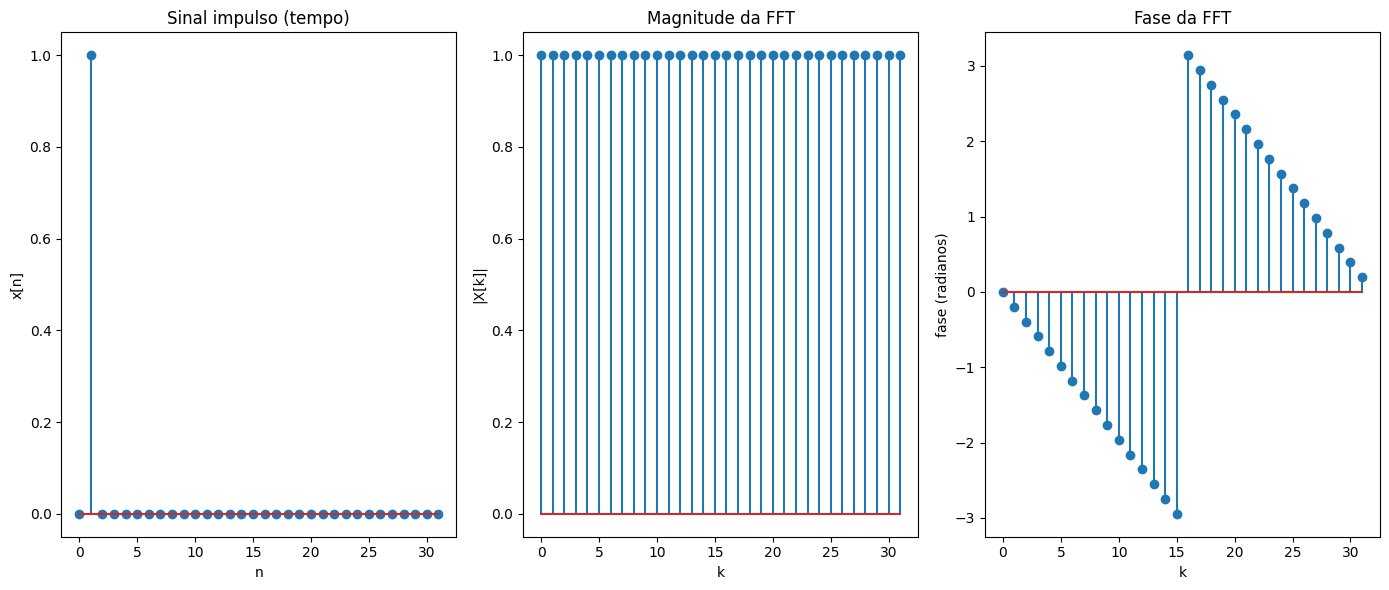

In [8]:
# Sinal impulsoc deslocado
x = np.zeros(20)
x[1] = 1

x_padded = zero_padding(x, potencia_de_2=True)
X = fft_dec(x_padded)
magnitude = np.abs(X)
fase = np.angle(X)

plt.figure(figsize=(14, 6))

# Sinal no tempo
plt.subplot(1, 3, 1)
plt.stem(x_padded)
plt.title("Sinal impulso (tempo)")
plt.xlabel("n")
plt.ylabel("x[n]")

# Magnitude da FFT
plt.subplot(1, 3, 2)
plt.stem(magnitude)
plt.title("Magnitude da FFT")
plt.xlabel("k")
plt.ylabel("|X[k]|")

# Fase da FFT
plt.subplot(1, 3, 3)
plt.stem(fase)
plt.title("Fase da FFT")
plt.xlabel("k")
plt.ylabel("fase (radianos)")

plt.tight_layout()
plt.show()


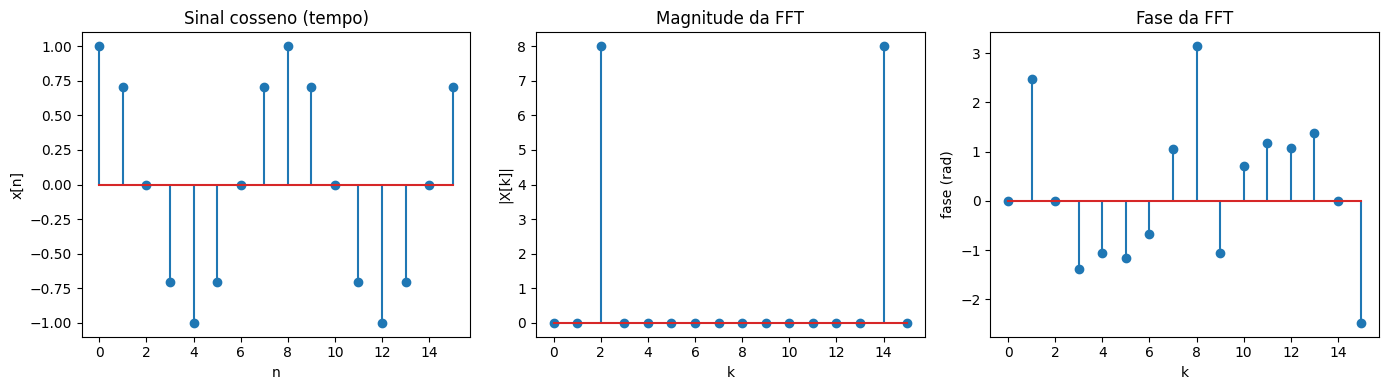

In [9]:
N = 16
f0 = 2
n = np.arange(N)
x = np.cos(2 * np.pi * f0 * n / N)


x_padded = zero_padding(x, potencia_de_2=True)
X = fft_dec(x_padded)
magnitude = np.abs(X)
fase = np.angle(X)

plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
plt.stem(n, x)
plt.title("Sinal cosseno (tempo)")
plt.xlabel("n")
plt.ylabel("x[n]")


plt.subplot(1, 3, 2)
plt.stem(magnitude)
plt.title("Magnitude da FFT")
plt.xlabel("k")
plt.ylabel("|X[k]|")

plt.subplot(1, 3, 3)
plt.stem(fase)
plt.title("Fase da FFT")
plt.xlabel("k")
plt.ylabel("fase (rad)")

plt.tight_layout()
plt.show()


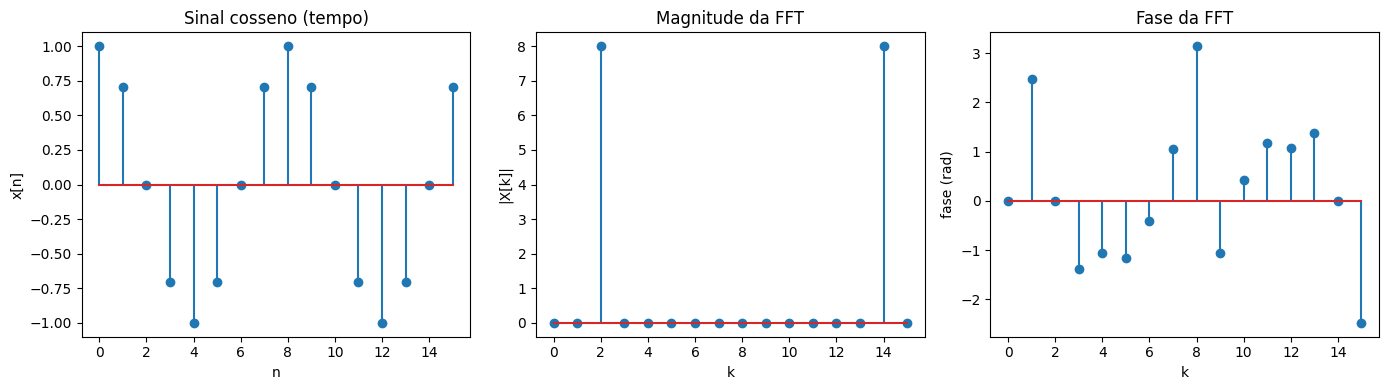

In [10]:
X = np.fft.fft(x_padded)
magnitude = np.abs(X)
fase = np.angle(X)

plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
plt.stem(n, x)
plt.title("Sinal cosseno (tempo)")
plt.xlabel("n")
plt.ylabel("x[n]")

plt.subplot(1, 3, 2)
plt.stem(magnitude)
plt.title("Magnitude da FFT")
plt.xlabel("k")
plt.ylabel("|X[k]|")

plt.subplot(1, 3, 3)
plt.stem(fase)
plt.title("Fase da FFT")
plt.xlabel("k")
plt.ylabel("fase (rad)")

plt.tight_layout()
plt.show()


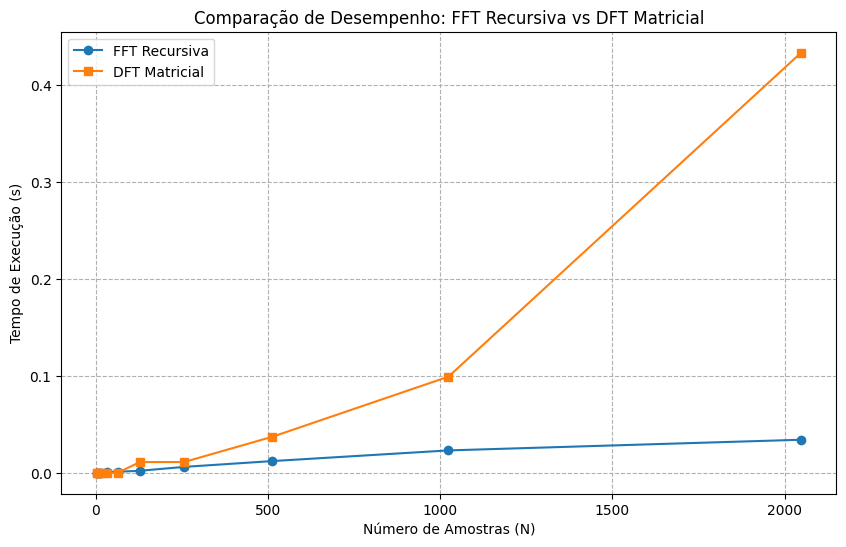

In [11]:
import time

def medir_tempo(funcao, entrada):
    inicio = time.time()
    funcao(entrada)
    fim = time.time()
    return fim - inicio

tamanhos = [2**n for n in range(1, 12)]

tempos_fft_dec = []
tempos_dft_matricial = []

for N in tamanhos:
    x = np.random.rand(N)
    
    tempo_fft = medir_tempo(fft_dec, x)
    tempos_fft_dec.append(tempo_fft)
  
    tempo_dft = medir_tempo(dft_matricial, x)
    tempos_dft_matricial.append(tempo_dft)

plt.figure(figsize=(10, 6))
plt.plot(tamanhos, tempos_fft_dec, 'o-', label='FFT Recursiva')
plt.plot(tamanhos, tempos_dft_matricial, 's-', label='DFT Matricial')
plt.xlabel('Número de Amostras (N)')
plt.ylabel('Tempo de Execução (s)')
plt.title('Comparação de Desempenho: FFT Recursiva vs DFT Matricial')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()